# Notebook that checks compatibility of focus loader output with transformation module

### 1. Imports

In [6]:
from torchvision import transforms as T
from models.transform.TransformModule import TransformModule
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [7]:
%load_ext autoreload
%autoreload 2

In [8]:
np.random.seed(0)

### 2. Loading of data

In [72]:
from data_utils.data_loaders import FocusLoader
dl = FocusLoader(
    images_dir='../../data/processed/COCO-2017/CocoPersonFocus/train/images',
    batch_size=96,
    csv_path='../../data/processed/COCO-2017/CocoPersonFocus/train/labels.csv',
    save_out_dir = None,
    shuffle=False,
    validation_split=0.15,
    num_workers=12,
    labels={
        "0": "none",
        "1": "person"
    },
    tf_image_size=(640, 640)
)
dl_train = dl.get_train_loader()

In [73]:
from data_utils.data_loaders import FocusLoader
dl2 = FocusLoader(
    images_dir='../../data/processed/COCO-2017/CocoPersonFocus/train/images',
    batch_size=96,
    csv_path='../../data/processed/COCO-2017/CocoPersonFocus/train/labels.csv',
    save_out_dir = None,
    shuffle=False,
    validation_split=0.15,
    num_workers=12,
    labels={
        "0": "none",
        "1": "person"
    },
)
dl_train2 = dl2.get_train_loader()

In [74]:
data1 = next(iter(dl_train))
data2 = next(iter(dl_train2))

In [75]:
data1['label']

tensor([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0])

In [76]:
data2['label']

tensor([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0])

In [77]:
data1['image'].shape, data2['image'].shape

(torch.Size([96, 3, 640, 640]), torch.Size([96, 3, 905, 905]))

In [93]:
idx_start, idx_end = 45, 93
label_1 = data1['label'][idx_start:idx_end]
pos = label_1 == 1
image_1 = data1['image'][idx_start:idx_end][pos]
tf_1 = data1['transform'][idx_start:idx_end][pos]
label_1 = label_1[pos]
print(f"{label_1=}")

label_1=tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1])


In [94]:
idx_start, idx_end = 45, 93
label_2 = data2['label'][idx_start:idx_end]
pos = label_2 == 1
image_2 = data2['image'][idx_start:idx_end][pos]
tf_2 = data2['transform'][idx_start:idx_end][pos]
label_2 = label_2[pos]
print(f"{label_2=}")

label_2=tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1])


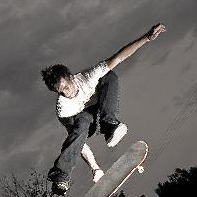

In [95]:
img = data2['image'][idx_start:idx_end][pos][1]
bbox = data2['bbox'][idx_start:idx_end][pos][1]
T.ToPILImage()(img).crop(bbox.tolist())

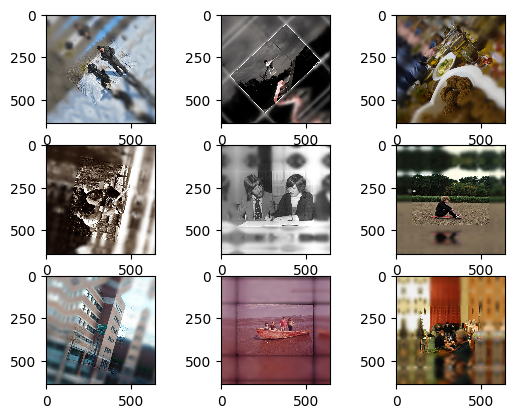

In [96]:
# example images for focus input with transformation to (640, 640)
for i in range(image_1.shape[0]):
    if i >= 9:
        break
    image = T.ToPILImage()(image_1[i,:].squeeze())
    plt.subplot(3,3,i+1)
    plt.imshow(image,interpolation='none')



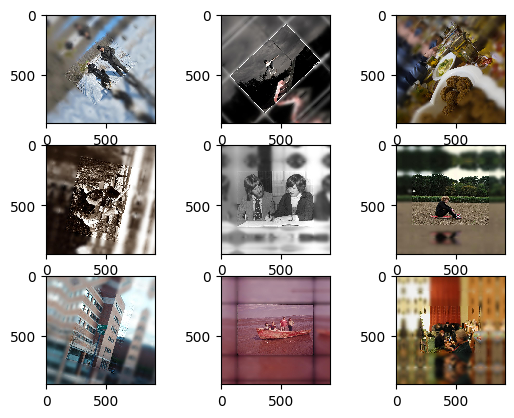

In [97]:
# example images for focus input with transformation to (905, 905)
for i in range(image_2.shape[0]):
    if i >= 9:
        break
    image = T.ToPILImage()(image_2[i,:].squeeze())
    plt.subplot(3,3,i+1)
    plt.imshow(image,interpolation='none')

### 3. Transformation module on outputs

In [98]:
tf_module_out = TransformModule(image_out_sz=(300, 300))(image_1, tf_1)

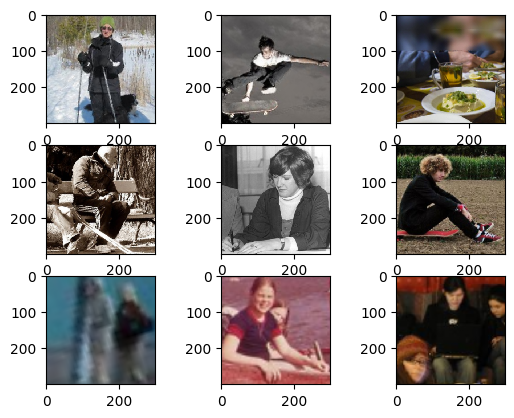

In [99]:
for i in range(tf_module_out.shape[0]):
    if i >= 9:
        break
    image = T.ToPILImage()(tf_module_out[i,:].squeeze())
    plt.subplot(3,3,i+1)
    plt.imshow(image,interpolation='none')

In [100]:
tf_module_2_out = TransformModule(image_out_sz=(300, 300))(image_2, tf_1)

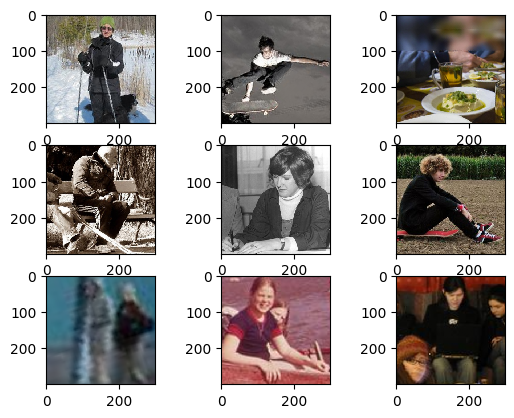

In [101]:
for i in range(tf_module_2_out.shape[0]):
    if i >= 9:
        break
    image = T.ToPILImage()(tf_module_2_out[i,:].squeeze())
    plt.subplot(3,3,i+1)
    plt.imshow(image,interpolation='none')

#### 4.Modifications

In [48]:
from data_utils.data_loaders import FocusLoader
dl = FocusLoader(
    images_dir='../../data/processed/COCO-2017/CocoCarFocus/train/images',
    batch_size=128,
    csv_path='../../data/processed/COCO-2017/CocoCarFocus/train/labels.csv',
    save_out_dir = None,
    shuffle=False,
    validation_split=0.15,
    num_workers=12,
    labels={
        "0": "none",
        "1": "car"
    },
    tf_image_size=(640, 640)
)
dl_train = dl.get_train_loader()

In [49]:
data = iter(dl_train)

In [50]:
b1 = next(data)
b2 = next(data)

In [54]:
idx_start, idx_end = 0, 120
label = b2['label'][idx_start:idx_end]
pos = label == 1
image = b2['image'][idx_start:idx_end][pos]
tf = b2['transform'][idx_start:idx_end][pos]
label = label[pos]

In [55]:
image.shape

torch.Size([15, 3, 640, 640])

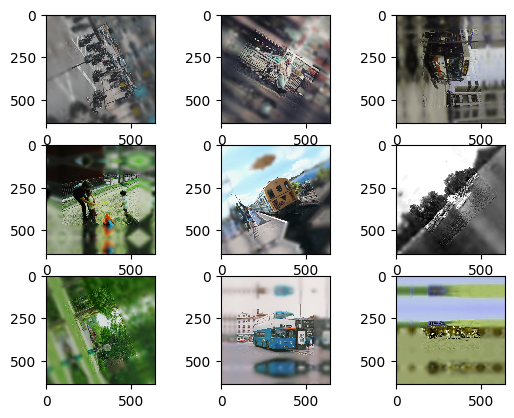

In [56]:
# example images for focus input with transformation to (640, 640)
for i in range(image.shape[0]):
    if i >= 9:
        break
    img = T.ToPILImage()(image[i,:].squeeze())
    plt.subplot(3,3,i+1)
    plt.imshow(img,interpolation='none')



In [57]:
tf_module_out = TransformModule(image_out_sz=(300, 300))(image, tf)

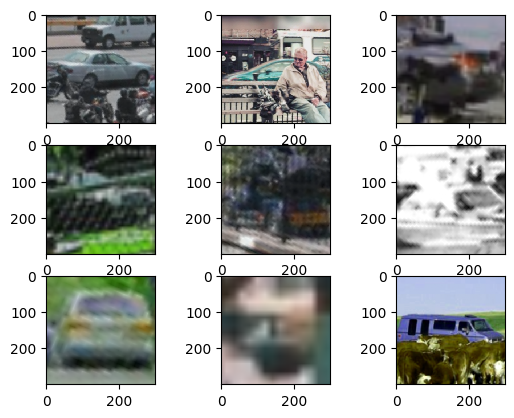

In [58]:
for i in range(tf_module_out.shape[0]):
    if i >= 9:
        break
    img = T.ToPILImage()(tf_module_out[i,:].squeeze())
    plt.subplot(3,3,i+1)
    plt.imshow(img,interpolation='none')

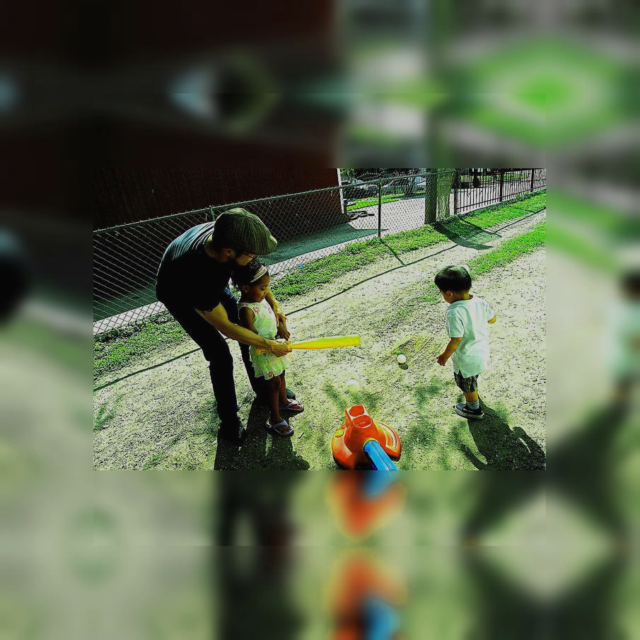

In [59]:
T.ToPILImage()(image[3,:].squeeze())

In [62]:
T.ToPILImage()(image[3,:].squeeze()).size

(640, 640)

In [42]:
bbox = data['bbox'][idx_start:idx_end][pos][5,:]

TypeError: '_MultiProcessingDataLoaderIter' object is not subscriptable

In [22]:
bbox

tensor([287.3086, 310.7287, 296.3888, 319.8089])

In [23]:
T.ToPILImage()(image[5,:].squeeze()).crop(bbox.tolist())